#Customer Segmentation

We work with Customer Personality Analysis: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download

**Problem statement**:

A customer segmentation strategy can help a firm develop or offer new products or a bundle of products as a combined offering.
The most obvious reason to segment customers is to be able to effectively and efficiently focus marketing efforts with further improvements in customer engagement and expected revenue growth. If a firm knows the different segments of its customer base, it can develop more effective marketing campaigns aimed specifically at that segment. A good segmentation model allows for a better understanding of customer requirements and therefore increases the chances of success of any marketing campaign developed by the organization.


**Research goals:**

1.   Determine the optimal number of customer clusters for the business
2.   Determine which marketing campaigns are appropriate for each cluster and thus maximize the impact of advertising





In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
%matplotlib inline

# Presenting data in a suitable form & Preprocessing data

Let's import our data and take a look at it:

In [ ]:
df = pd.read_csv("marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

There is information about 2240 people and 29 different parameters

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

For further investigation, we delete all the missing variables. Now the data contains information about 2216 people.

In [ ]:
df.dropna(inplace = True)

Calculating the age by the year of birth:

In [ ]:
df["Year_Birth"] = 2022 - df["Year_Birth"]
df.rename(columns = {'Year_Birth': 'Age'}, inplace = True)

Combining all amount spent during 2 years:

In [ ]:
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

'Dt_Customer', which stands for date of customer's enrollment with the company, seems to complicate our data. Let's leave it out:

In [ ]:
df.drop("Dt_Customer", axis=1, inplace=True)

Let's also leave out empty and unneccessary data:

In [ ]:
df.drop(['Z_CostContact','Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',\
    'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response'], axis = 1, inplace = True)

In [ ]:
df.drop("ID", axis=1, inplace=True)
df

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent
0,65,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617
1,68,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27
2,57,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776
3,38,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53
4,41,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,1341
2236,76,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,444
2237,41,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1241
2238,66,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,843


In [ ]:
df.describe()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,53.179603,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,607.075361
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,602.900476
min,26.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,45.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,69.000000
50%,52.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,396.500000
75%,63.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1048.000000
max,129.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2525.000000


Next, we need to binarize the remaining non-numeric variables:

In [ ]:
X = pd.get_dummies(df)
X.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,65,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,0,0
1,68,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,1,0,0,0
2,57,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,1,0,0
3,38,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,0,0
4,41,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
X.shape

(2216, 30)

In [ ]:
X.iloc[5]

Age                           55.0
Income                     62513.0
Kidhome                        0.0
Teenhome                       1.0
Recency                       16.0
MntWines                     520.0
MntFruits                     42.0
MntMeatProducts               98.0
MntFishProducts                0.0
MntSweetProducts              42.0
MntGoldProds                  14.0
NumDealsPurchases              2.0
NumWebPurchases                6.0
NumCatalogPurchases            4.0
NumStorePurchases             10.0
NumWebVisitsMonth              6.0
Spent                        716.0
Education_2n Cycle             0.0
Education_Basic                0.0
Education_Graduation           0.0
Education_Master               1.0
Education_PhD                  0.0
Marital_Status_Absurd          0.0
Marital_Status_Alone           0.0
Marital_Status_Divorced        0.0
Marital_Status_Married         0.0
Marital_Status_Single          0.0
Marital_Status_Together        1.0
Marital_Status_Widow

Now, we shall visualize our results using attribute distribution hystograms and their pair-wise plots.

In [ ]:
def pairplot(X, y=None, colors=None):
    fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], figsize=(15,15))

    if y is None:
        y = np.array([0]*X.shape[0])
    unique_y, col_idx = np.unique(y, return_inverse=True)
    if colors is None:
        colors = ['blue']
    colors = np.array(colors)
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            if i == j:
                for k, v in enumerate(unique_y):
                    axes[i, j].hist(X.iloc[y == v, i].values, 15, color=colors[k], alpha=0.5)
            else:
                axes[i, j].scatter(X.iloc[:, i].values, X.iloc[:, j].values, c=colors[col_idx], s=8)
            if i == X.shape[1] - 1:
                axes[i, j].set_xlabel(X.columns[j])
            if j == 0:
                axes[i, j].set_ylabel(X.columns[i])
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

And computing frequency of unique attribute values in each cluster.

In [ ]:
def value_counts(X, y=None):
    for c in X.columns:
        print("---- %s ---" % c)
        if y is None:
            print(X[c].value_counts())
        else:
            print(pd.pivot_table(pd.DataFrame({c: X[c].values, 'cluster': y}), index=[c], columns=['cluster'], aggfunc=len))

In [ ]:
X.columns

Index(['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Spent', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

Sorting out quantitative and categorical attributes:

In [ ]:
cat_features = ["Education", "Marital_Status"]
num_features = [c for c in df.columns if not(c in cat_features)]

In [ ]:
num_features

['Age',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Spent']

Let's take a look at data distribution:

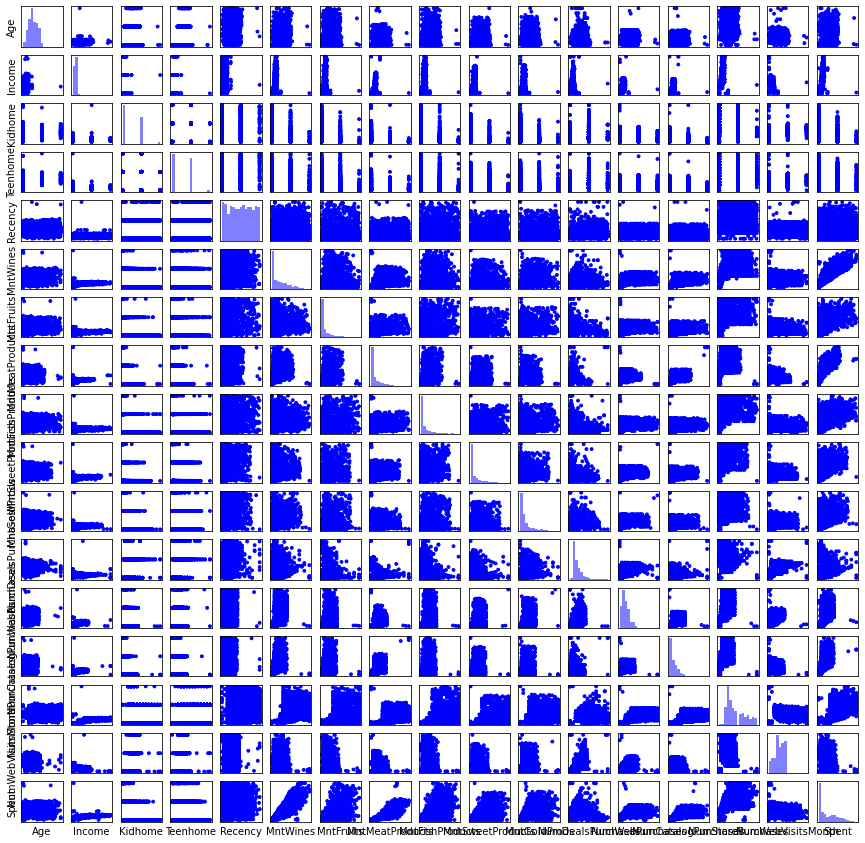

In [ ]:
pairplot(df[num_features])

In [ ]:
value_counts(df[cat_features])

---- Education ---
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
---- Marital_Status ---
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [ ]:
df.dtypes

Age                      int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Spent                    int64
dtype: object

In [ ]:
X.dtypes

Age                          int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Spent                        int64
Education_2n Cycle           uint8
Education_Basic              uint8
Education_Graduation         uint8
Education_Master             uint8
Education_PhD                uint8
Marital_Status_Absurd        uint8
Marital_Status_Alone         uint8
Marital_Status_Divorced      uint8
Marital_Status_Married       uint8
Marital_Status_Single        uint8
Marital_Status_Together      uint8
Marital_Status_Widow

Standardizing features:

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = pd.DataFrame(scaler.transform(X), columns = X.columns)

In [ ]:
scaled_features.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
1,1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,1.924807,-0.590553,-0.188452,-0.030056
2,0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
3,-1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.444062,-0.526530,-0.030056,-0.036819,-0.341958,-0.794110,-0.519533,1.693329,-0.188452,-0.030056
4,-1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.444062,1.899228,-0.030056,-0.036819,-0.341958,1.259271,-0.519533,-0.590553,-0.188452,-0.030056


In [ ]:
scaled_features.shape

(2216, 30)

Reducing dimesionality using principal component analysis (PCA):

In [ ]:
pca = PCA(n_components = 3)
pca.fit(scaled_features)
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["Education","Income", "Kidhome"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,1.667339e-16,2.647971,-5.097296,-2.469214,-0.668196,2.290479,7.072367
Income,2216.0,-6.412841e-18,1.466379,-4.044475,-1.142560,-0.128804,1.011875,4.855296
Kidhome,2216.0,2.565136e-17,1.292392,-2.938504,-1.155131,0.183264,1.019324,3.981811


Visualizing data:

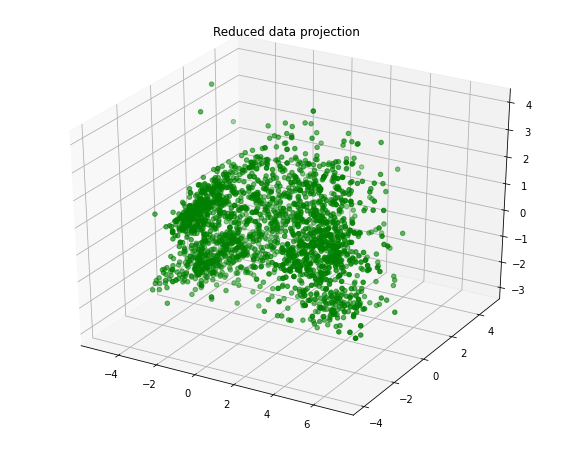

In [ ]:
x = PCA_df["Education"]
y = PCA_df["Income"]
z = PCA_df["Kidhome"]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c="green", marker="o" )
ax.set_title("Reduced data projection")
plt.show()

Next, we proceed to the application of various clustering methods. In our study, we considered: Clustering with KMeans; Agglomerative Clustering; Gaussian Mixture Model for Clustering.

For each of the algoritms, we performed the following steps:
1.   Application of clustering algorithms on data;
2.   Evaluation of the results of the  algorithms using the Silhouette coefficient and the Calinski-Harabasz index;
3.   Examinanion of the patterns in formed clusters;
4.   Identification of the nature of cluster patterns








# Clustering with KMeans

The first method for clustering is KMeans.The main idea of the K-means algorithm is to determine the k number of centroids, and then distributes each data point to the nearest cluster, while keeping the centroids as small as possible. It allows  to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

First, let's determine the optimal number of clusters:

In [ ]:
params = np.arange(2, 10)

In [ ]:
j = []
for k in params:
    kmns = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns.fit(PCA_df)
    j.append(kmns.inertia_)
j = np.array(j)

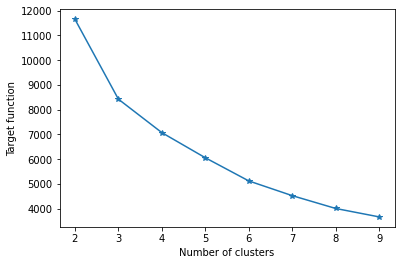

In [ ]:
plt.plot(params, j, "-*")
plt.xlabel("Number of clusters")
plt.ylabel("Target function")
plt.show()

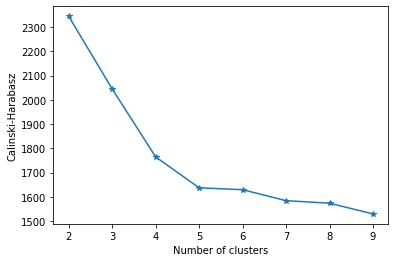

In [ ]:
j = []
for k in params:
    kmns = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns.fit(PCA_df)
    j.append(calinski_harabasz_score(PCA_df, kmns.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz')
plt.show()
     

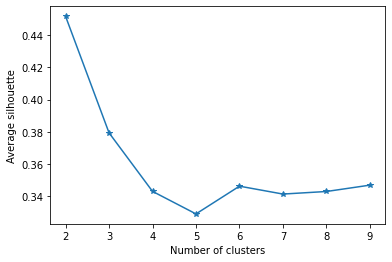

In [ ]:
j = []
for k in params:
    kmns = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns.fit(PCA_df)
    j.append(silhouette_score(PCA_df, kmns.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Looks like the optimal number of clusters is **4**

In [ ]:
kmns = KMeans(n_clusters = 4, random_state = 8, n_init = 4, max_iter = 1000)
y_pred = kmns.fit_predict(PCA_df)

In [ ]:
def metrics(X, y_pred):
    print("Calinski-Harabasz: %.4f" % calinski_harabasz_score(X, y_pred))

    silhouette_avg = silhouette_score(X, y_pred)
    print("Average silhouette: %.4f" % silhouette_avg)

    n_clusters = len(np.unique(y_pred))

    # Show how silhouettes are changed in each cluster
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlim([-0.1, 1])
    # 10 is needed for indentation
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    sample_silhouette_values = silhouette_samples(X, y_pred)

    y_lower = 10
    # iterate over all the clusters
    for i in range(n_clusters):
        # Aggregate and sort silhouettes of objects in the cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("nipy_spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Print the number of the cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute a new lower boundary between cluster silhouettes 
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouettes of different clusters")
    ax1.set_xlabel("Silhouette value")
    ax1.set_ylabel("Cluster number")

    # Vertical line shows average value of silhouette
    ax1.axvline(x=silhouette_avg, color="red", linestyle="-.")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Let's evaluate the results of the KMeans algorithm using **the Silhouette coefficient** and **the Calinski-Harabasz index**:

Calinski-Harabasz: 1764.7810
Average silhouette: 0.3432


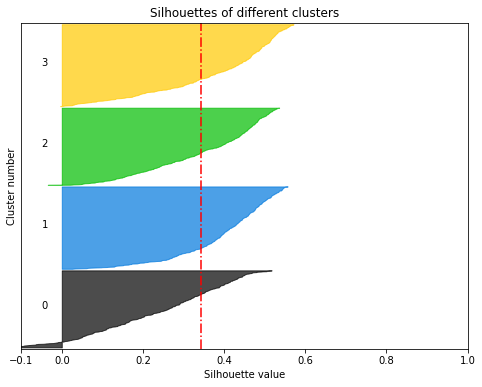

In [ ]:
metrics(PCA_df, y_pred)

In [ ]:
#check the Calinski-Harabasz index for the above results:
calinski_harabasz_score(PCA_df, y_pred)

1764.7809953423484

Let's check the proportions of clusters according to K-means clustering. According to the graph below, we can see that the proportions of the clusters are approximately the same:

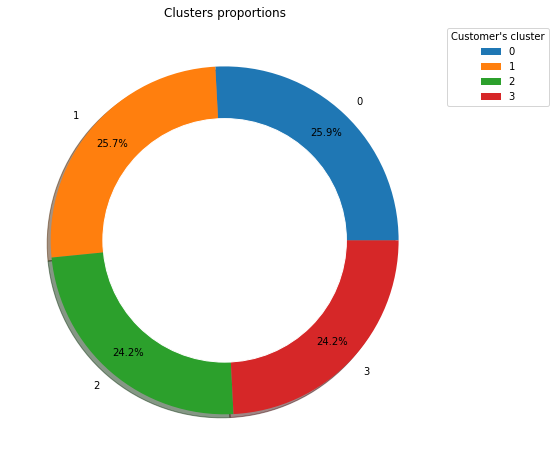

In [ ]:
df["Kmeans_Clusters"]= y_pred
sizes = dict(df['Kmeans_Clusters'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Next, we try to determine patterns in the formed clusters for clustering K Means. To do this, we consider the distribution patterns for such variables as income, education, shopping types, web visits and catalog purchases:

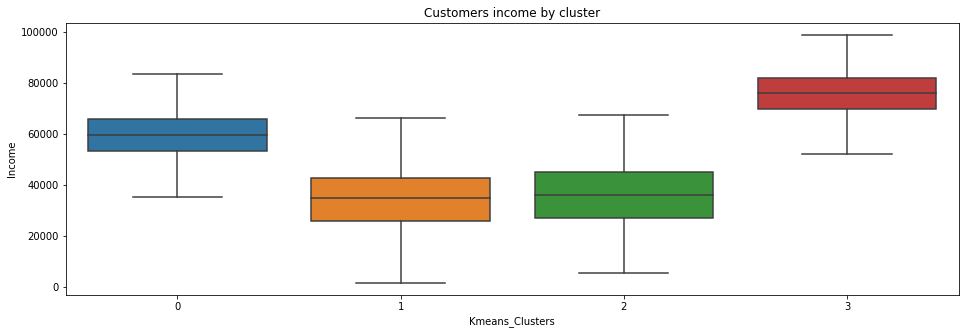

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=df, x='Kmeans_Clusters', y='Income', showfliers=False)
plt.show()

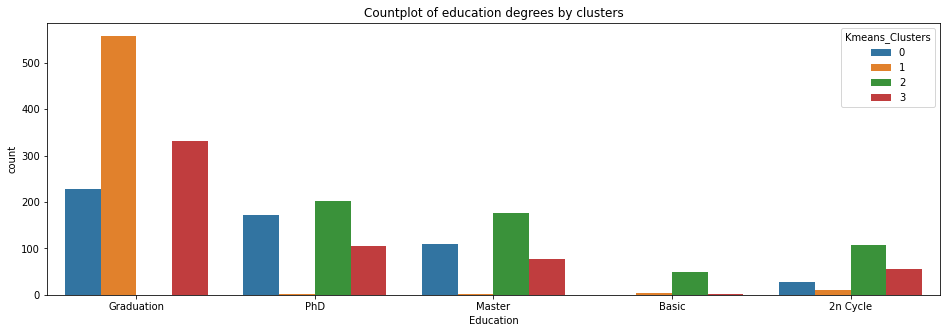

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df, x='Education', hue='Kmeans_Clusters')
plt.show()

In [ ]:
df.insert(1, 'Kids', df['Kidhome'] + df['Teenhome'])

In [ ]:
df

,Age,Kids,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent,Kmeans_Clusters
0,65,0,Graduation,Single,58138.0,0,0,58,635,88,...,172,88,88,3,8,10,4,7,1617,3
1,68,2,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,6,2,1,1,2,5,27,1
2,57,0,Graduation,Together,71613.0,0,0,26,426,49,...,111,21,42,1,8,2,10,4,776,3
3,38,1,Graduation,Together,26646.0,1,0,26,11,4,...,10,3,5,2,2,0,4,6,53,1
4,41,1,PhD,Married,58293.0,1,0,94,173,43,...,46,27,15,5,5,3,6,5,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,1,Graduation,Married,61223.0,0,1,46,709,43,...,42,118,247,2,9,3,4,5,1341,3
2236,76,3,PhD,Together,64014.0,2,1,56,406,0,...,0,0,8,7,8,2,5,7,444,0
2237,41,0,Graduation,Divorced,56981.0,0,0,91,908,48,...,32,12,24,1,2,3,13,6,1241,3
2238,66,1,Master,Together,69245.0,0,1,8,428,30,...,80,30,61,2,6,5,10,3,843,0


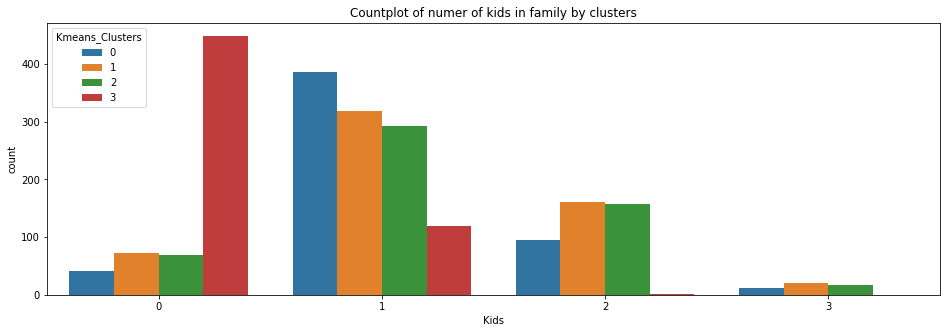

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of numer of kids in family by clusters')
sns.countplot(data=df, x='Kids', hue='Kmeans_Clusters')
plt.show()

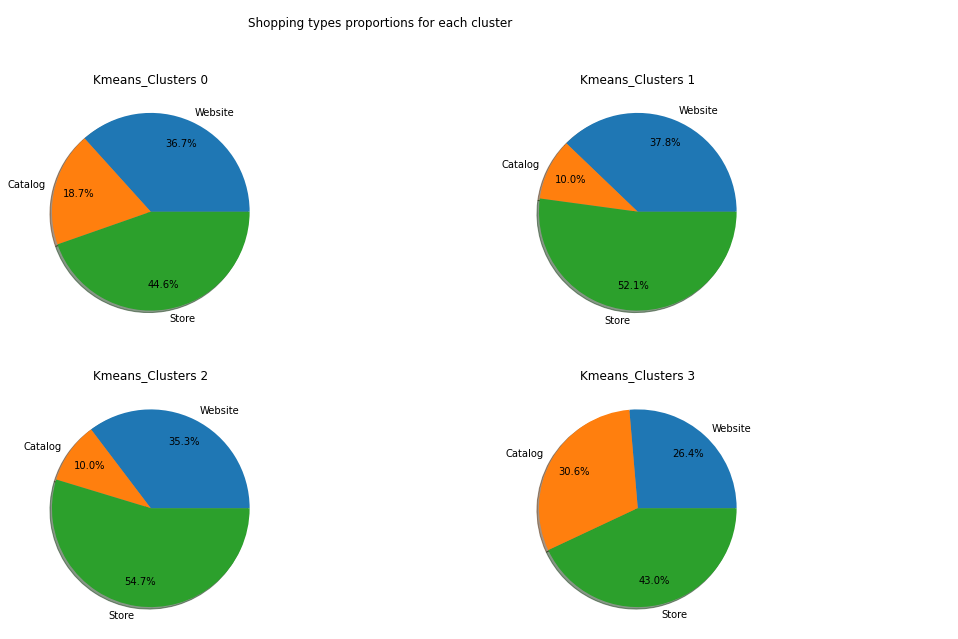

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        num = df.query(f'Kmeans_Clusters == {k}').filter(regex='Num[^Deals|Total].+Purchases').sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"Kmeans_Clusters {k}")
        axes[i, j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, shadow=True)
        k += 1
fig.suptitle('Shopping types proportions for each cluster')
fig.legend(title="Shopping type", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1)) 
fig.show()

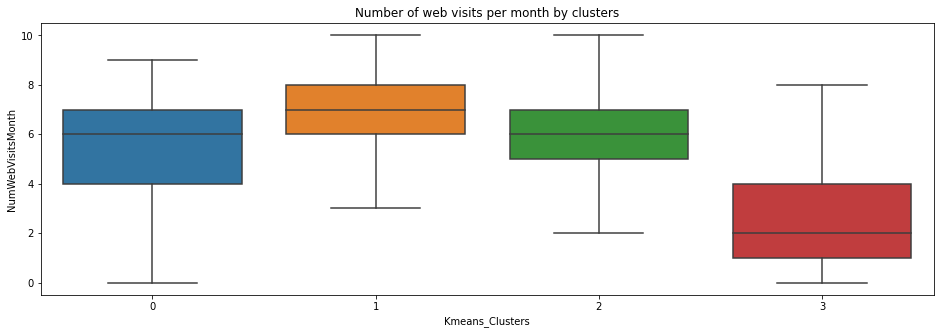

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=df, x='Kmeans_Clusters', y='NumWebVisitsMonth', showfliers=False)
plt.show()

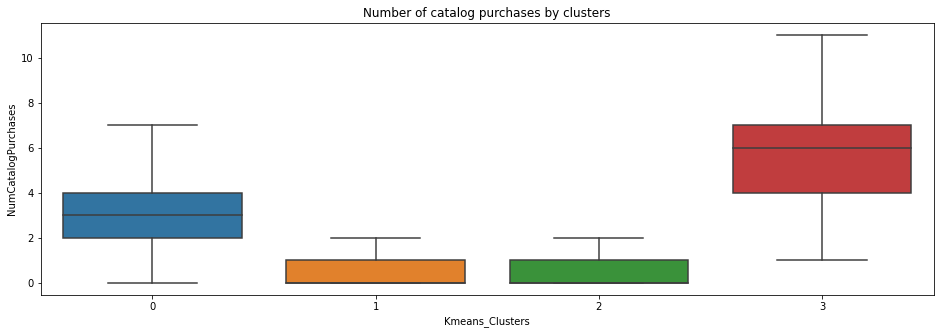

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Number of catalog purchases by clusters')
ax = sns.boxplot(data=df, x='Kmeans_Clusters', y='NumCatalogPurchases', showfliers=False)
plt.show()

#Agglomerative Clustering

The second method for clustering is Agglomerative Clustering.Agglomerative Clustering is a type of hierarchical clustering algorithm that considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.


In [ ]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["AggClusters"] = yhat_AC
df["AggClusters"]= yhat_AC

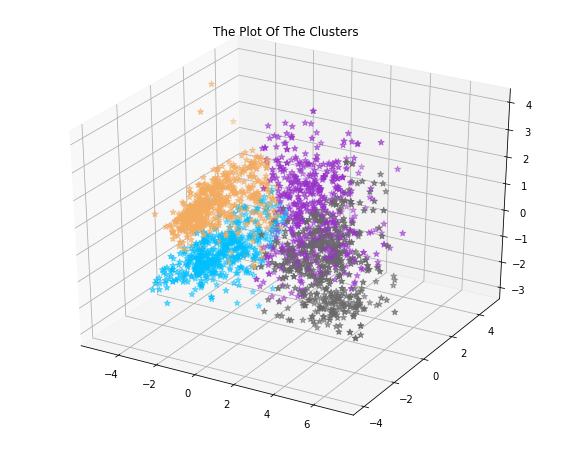

In [ ]:
from matplotlib import colors
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
cmap = colors.ListedColormap(["#9932CC", "#F5DEB3", "#00BFFF", "#F4A460", "#696969", "#F3AB60"])
ax.scatter(x, y, z, s=40, c=PCA_df["AggClusters"], marker='*', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

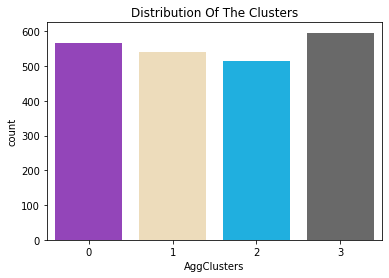

In [ ]:
#Plotting countplot of clusters
pal = ["#9932CC", "#F5DEB3", "#00BFFF", "#696969"]
pl = sns.countplot(x=PCA_df["AggClusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

Let's evaluate the results of the Agglomerative Clustering algorithm using **the Silhouette coefficient** and **the Calinski-Harabasz index**:

Calinski-Harabasz: 1962.5036
Average silhouette: 0.4263


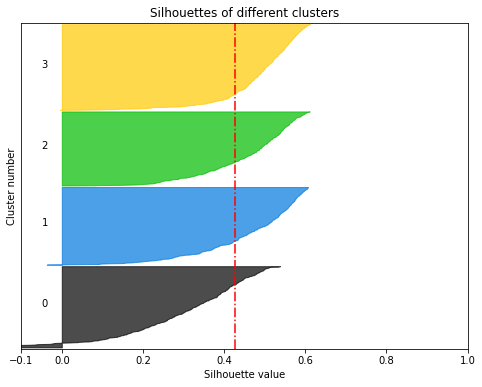

In [ ]:
metrics(PCA_df, yhat_AC)

In [ ]:
#check the Calinski-Harabasz index for the above results:
calinski_harabasz_score(PCA_df, yhat_AC)

1686.8379880393152

Next, we do all the same steps as for KMeans clusterization:

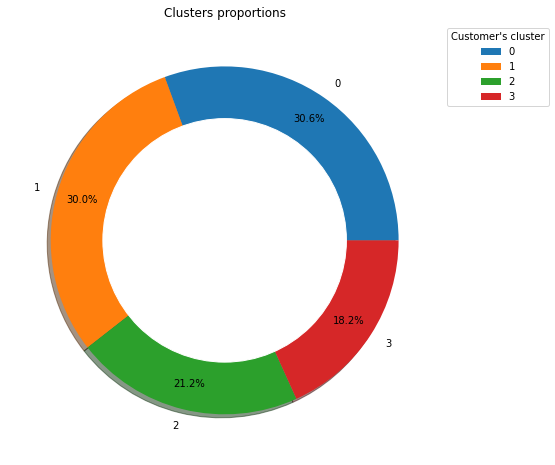

In [ ]:
sizes = dict(df['AggClusters'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

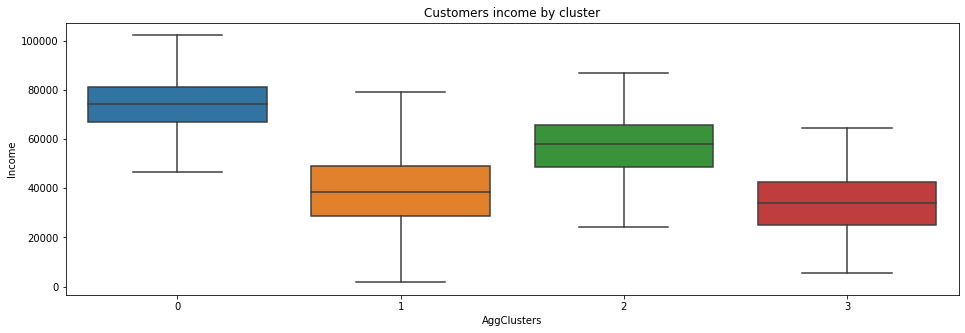

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=df, x='AggClusters', y='Income', showfliers=False)
plt.show()

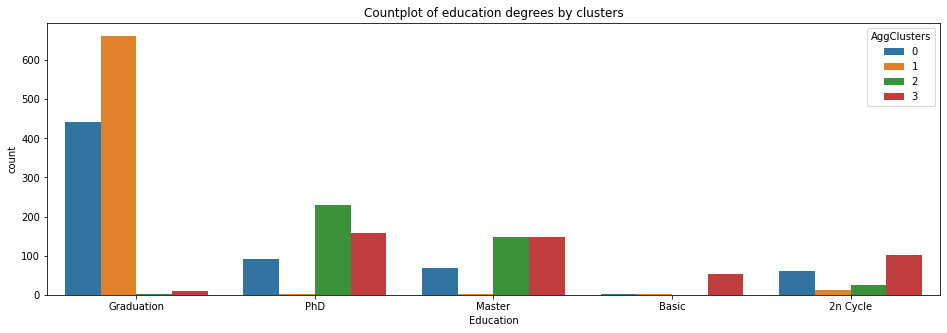

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df, x='Education', hue='AggClusters')
plt.show()

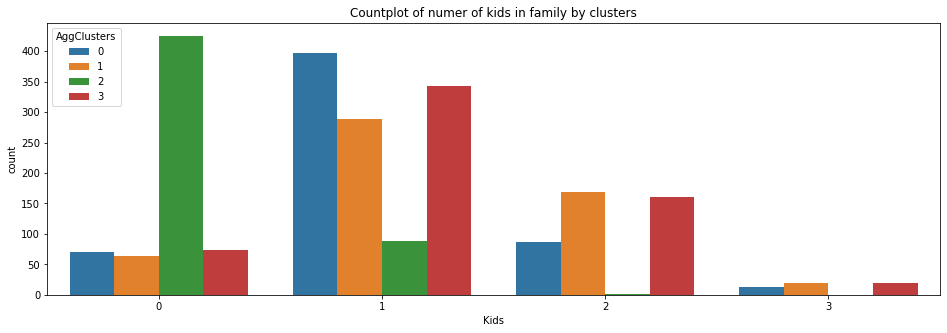

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of numer of kids in family by clusters')
sns.countplot(data=df, x='Kids', hue='AggClusters')
plt.show()

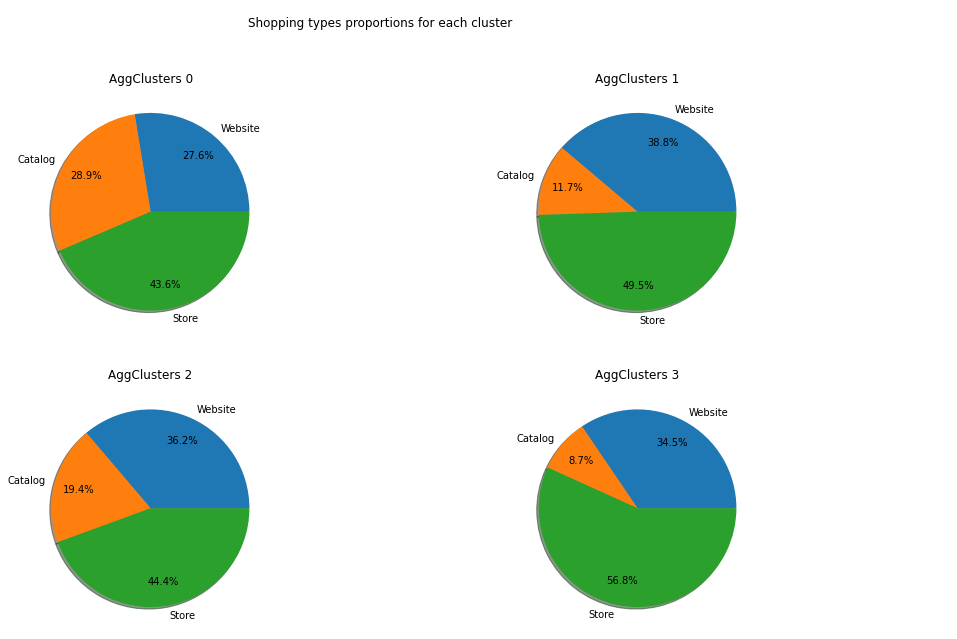

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        num = df.query(f'AggClusters == {k}').filter(regex='Num[^Deals|Total].+Purchases').sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"AggClusters {k}")
        axes[i, j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, shadow=True)
        k += 1
fig.suptitle('Shopping types proportions for each cluster')
fig.legend(title="Shopping type", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1)) 
fig.show()

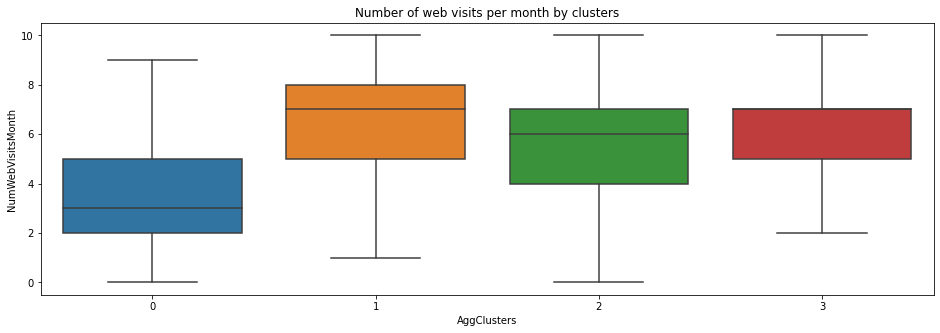

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=df, x='AggClusters', y='NumWebVisitsMonth', showfliers=False)
plt.show()

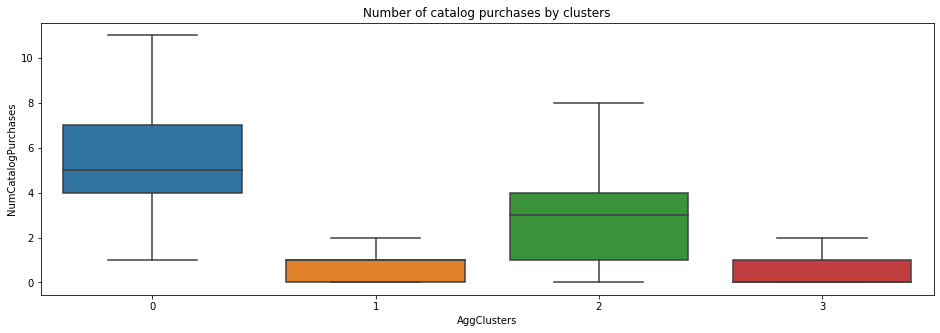

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Number of catalog purchases by clusters')
ax = sns.boxplot(data=df, x='AggClusters', y='NumCatalogPurchases', showfliers=False)
plt.show()

#Gaussian Mixture Model (GMM) for Clustering

The third algorithm is Gaussian Mixture Model for Clustering. 
This algorithm implemented via the GaussianMixture class and the main configuration to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data. The advantages of GMM is that this algorithm can analyze more complex and mixed data
and can handle outliers more easily.



In [ ]:
#Initiating the GaussianMixture Clustering model 
GP = GaussianMixture(n_components=4)
# fit model and predict clusters
GP_df = GP.fit_predict(PCA_df)
PCA_df["GM_Clusters"] = GP_df
#Adding the Clusters feature to the orignal dataframe.
df["GM_Clusters"]= GP_df

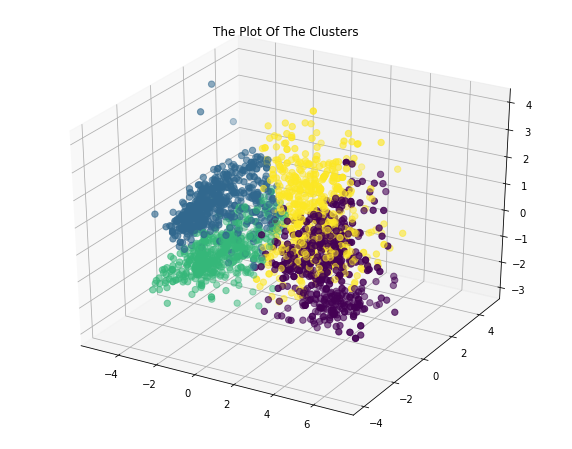

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["GM_Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

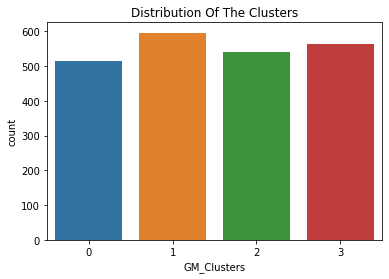

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["GM_Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

Let's evaluate the results of the GMM Clustering algorithm using **the Silhouette coefficient** and **the Calinski-Harabasz index**:

Calinski-Harabasz: 2235.1100
Average silhouette: 0.4724


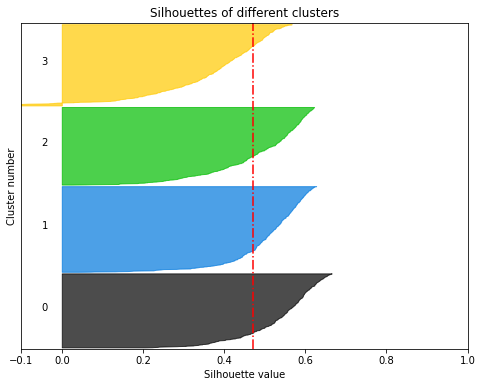

In [ ]:
metrics(PCA_df, GP_df)

In [ ]:
#check the Calinski-Harabasz index for the above results:
calinski_harabasz_score(PCA_df, GP_df)

2235.1100397272407

Next, we do all the same steps as for KMeans and Agglomerative Clustering:

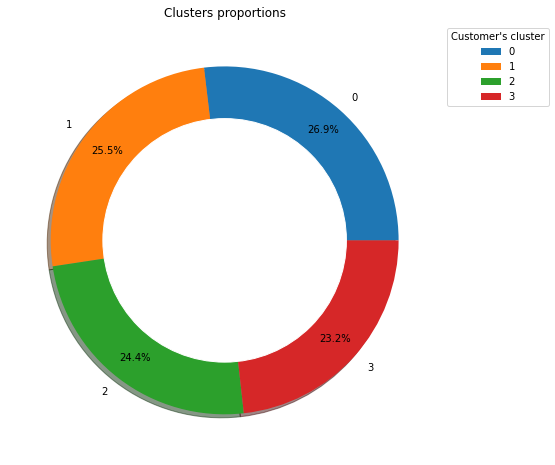

In [ ]:
sizes = dict(df['GM_Clusters'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sorted(sizes.keys()), autopct="%.1f%%", pctdistance=0.85, shadow=True)
plt.legend(title="Customer's cluster", labels=sorted(sizes.keys()), bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

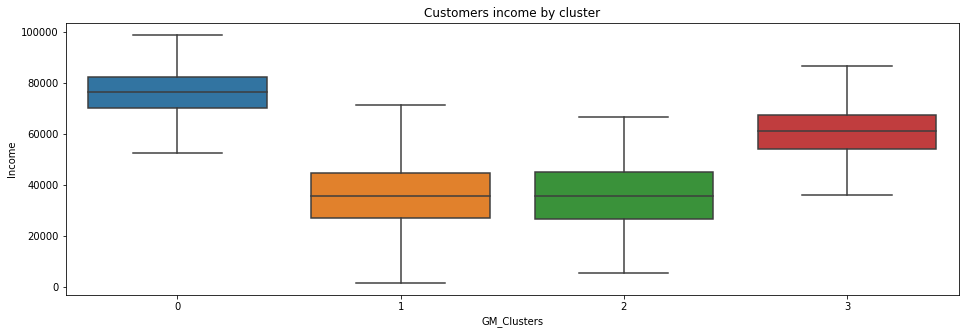

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Customers income by cluster')
ax = sns.boxplot(data=df, x='GM_Clusters', y='Income', showfliers=False)
plt.show()

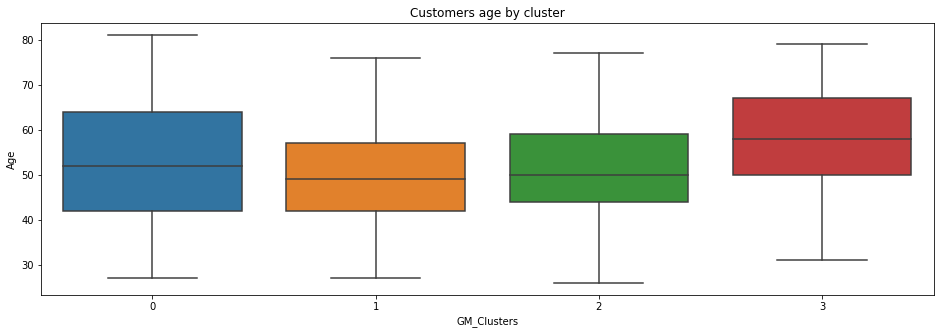

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Customers age by cluster')
ax = sns.boxplot(data=df, x='GM_Clusters', y='Age', showfliers=False)
plt.show()

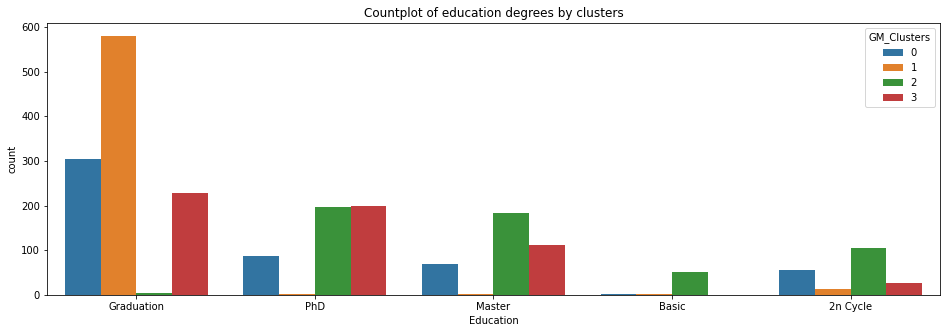

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of education degrees by clusters')
sns.countplot(data=df, x='Education', hue='GM_Clusters')
plt.show()

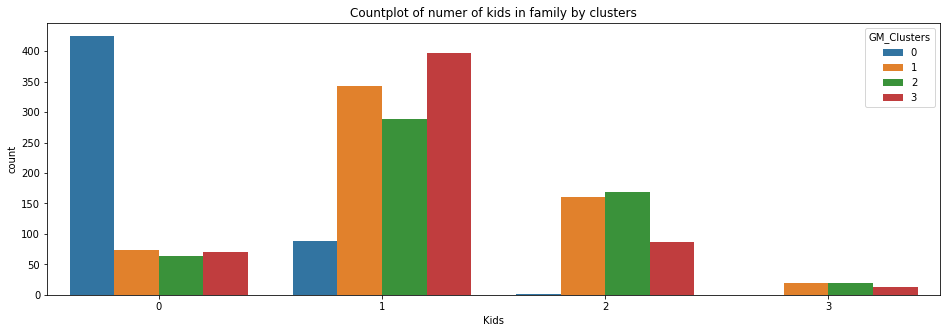

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Countplot of numer of kids in family by clusters')
sns.countplot(data=df, x='Kids', hue='GM_Clusters')
plt.show()

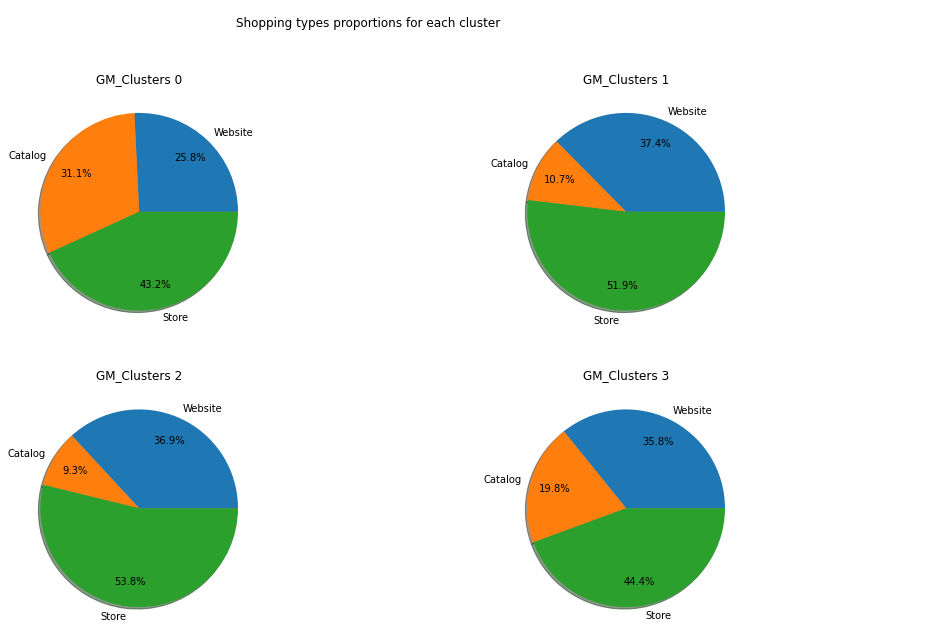

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        num = df.query(f'GM_Clusters == {k}').filter(regex='Num[^Deals|Total].+Purchases').sum(axis=0)
        sizes = dict(num)
        axes[i, j].set_title(f"GM_Clusters {k}")
        axes[i, j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75, shadow=True)
        k += 1
fig.suptitle('Shopping types proportions for each cluster')
fig.legend(title="Shopping type", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1, 1)) 
fig.show()

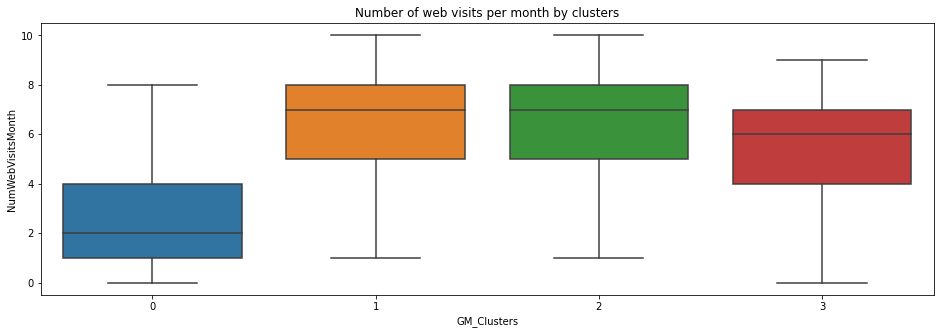

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Number of web visits per month by clusters')
ax = sns.boxplot(data=df, x='GM_Clusters', y='NumWebVisitsMonth', showfliers=False)
plt.show()

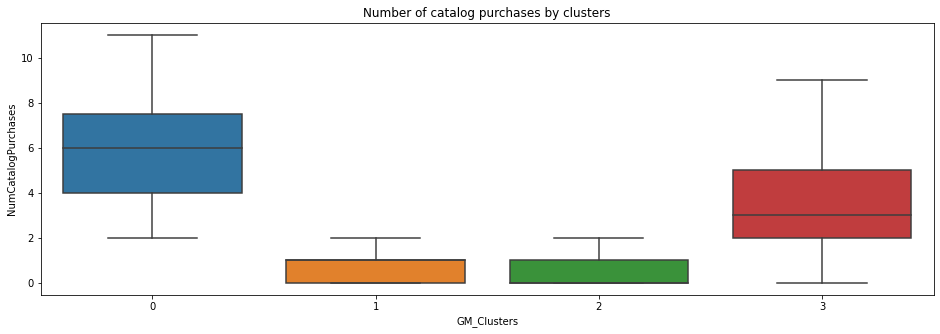

In [ ]:
plt.figure(figsize=(16,5))
plt.title(f'Number of catalog purchases by clusters')
ax = sns.boxplot(data=df, x='GM_Clusters', y='NumCatalogPurchases', showfliers=False)
plt.show()

#Profiled the formed clusters & Conclusion

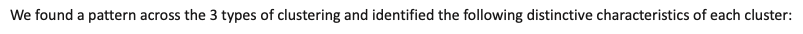

0 cluster
#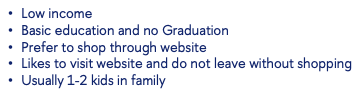

image.png

1 cluster

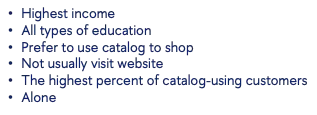

image.png

2 cluster

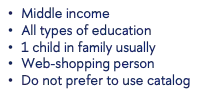

image.png


3 cluster

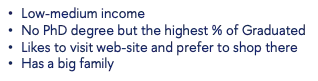

image.png